# Tour & Travels Customer Churn Prediction
Predict Tour & Travels Customer Churn

# Description
A Tour & Travels Company Wants To Predict Whether A Customer Will Churn Or Not Based On Indicators Given Below.
Help Build Predictive Models And Save The Company's Money.
Perform Fascinating EDAs.
The Data Was Used For Practice Purposes And Also During A Mini Hackathon, Its Completely Free To Use

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv('Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [3]:
# 결측치 확인
df.isnull().sum() 
# 결측치 x

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

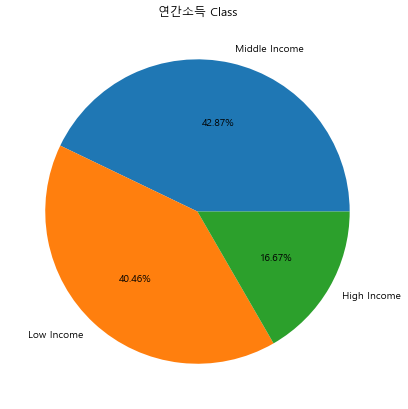

In [4]:
plt.figure(figsize=(7,7))
df['AnnualIncomeClass'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title("연간소득 Class")
plt.ylabel("")
plt.show()

In [5]:
# 2개의 카테고리를 갖는 데이터는 replace를 사용하여 0,1로 변환 
df = df.replace(['No','Yes'],[0,1])
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,Middle Income,6,0,1,0
1,34,1,Low Income,5,1,0,1
2,37,0,Middle Income,3,1,0,0
3,30,0,Middle Income,2,0,0,0
4,30,0,Low Income,1,0,0,0


더미만들기

In [6]:
df = pd.get_dummies(df,drop_first=True)
df

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,FrequentFlyer_1,FrequentFlyer_No Record,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,0,0,0,0,1
1,34,5,1,0,1,1,0,1,0
2,37,3,1,0,0,0,0,0,1
3,30,2,0,0,0,0,0,0,1
4,30,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
949,31,1,0,0,0,1,0,1,0
950,30,5,0,1,0,0,0,0,1
951,37,4,0,0,0,0,0,0,1
952,30,1,1,1,0,0,0,1,0


In [7]:
# 예측해야 할 변수인 `Target`를 제거하여 머신러닝 입력값인 x에 저장
x = df.drop(columns = ['Target']).to_numpy()
x

array([[34,  6,  0, ...,  0,  0,  1],
       [34,  5,  1, ...,  0,  1,  0],
       [37,  3,  1, ...,  0,  0,  1],
       ...,
       [37,  4,  0, ...,  0,  0,  1],
       [30,  1,  1, ...,  0,  1,  0],
       [31,  1,  0, ...,  0,  0,  0]], dtype=int64)

In [8]:
# 예측해야 할 변수 `Target`만을 선택하여 numpy 형태로 y에 저장
y = df['Target']
y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용
y

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 모델 class를 가져 옵니다.
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습합니다.
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 출력합니다.
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9580602883355177
0.8429319371727748


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


models = []
models.append(('LR', LogisticRegression(max_iter =5000))) # 로지스틱 분류기 
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

LR - train_score : 0.816514, test score : 0.832461
LDA - train_score : 0.825688, test score : 0.842932
KNN - train_score : 0.897772, test score : 0.848168
NB - train_score : 0.771953, test score : 0.774869
RF - train_score : 0.958060, test score : 0.837696
SVM - train_score : 0.872870, test score : 0.842932


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB - train_score : 0.955439, test score : 0.853403


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# 성능 비교에 필요한 모델 파라미터들을 정의합니다.
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [3, 4, 5, 6],
              'max_features': ['auto', 'sqrt', 'log2']}

# 5개의 fold를 구성합니다.
cv = KFold(n_splits=5)
# 의사결정트리 모델을 튜닝하기 위하여 선언합니다.
DT = DecisionTreeClassifier()

# 모델 튜닝을 우해서 GridSearchCV를 사용합니다.
DT_CV = GridSearchCV(DT, parameters, scoring = 'accuracy', cv = cv, n_jobs= -1)
# 학습을 수행합니다.
DT_CV.fit(x_train, y_train)

# 결과를 출력합니다.
print(DT_CV.score(x_train, y_train))
print(DT_CV.score(x_test, y_test))

0.8846657929226737
0.8691099476439791


In [13]:
DT_CV.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2'}

In [14]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_DT_CV = DT_CV.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_DT_CV.score(x_test, y_test)

0.8691099476439791

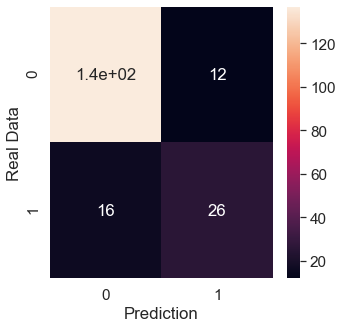

array([[137,  12],
       [ 16,  26]], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix

model_predition = models[-1][1].predict(x_test)

cm = confusion_matrix(y_test, model_predition)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
cm

In [16]:
y_pred = model.predict(x_test)

In [17]:
import sklearn.metrics as mt
accuracy = mt.accuracy_score(y_test, y_pred)
accuracy

0.8534031413612565

In [18]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Recall score: {}".format(recall_score(y_test, model_predition)))
print("Precision score: {}".format(precision_score(y_test, model_predition)))

Recall score: 0.6190476190476191
Precision score: 0.6842105263157895


In [19]:
for i in range(20): 
    prediction = models[-1][1].predict(x_test[i].reshape(1,-1))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
1 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
2 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
3 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
4 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 1
5 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
6 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
7 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
8 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 0
9 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 0
10 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
11 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
12 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
13 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
14 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
15 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 0
16 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
17 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
18 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
19 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0


In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [29]:
for i in df.Target.values:
    if i  == 0:
        df.Target.replace(i, 'O', inplace = True)
    else:
        df.Target.replace(i, 'X', inplace = True)

[Text(129.34651898734177, 262.09285714285716, 'FrequentFlyer_1 <= 0.5\ngini = 0.363\nsamples = 763\nvalue = [581, 182]\nclass = O'),
 Text(45.911392405063296, 242.67857142857144, 'Age <= 28.5\ngini = 0.208\nsamples = 533\nvalue = [470, 63]\nclass = O'),
 Text(15.89240506329114, 223.26428571428573, 'ServicesOpted <= 1.5\ngini = 0.476\nsamples = 77\nvalue = [47, 30]\nclass = O'),
 Text(12.360759493670887, 203.85000000000002, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = O'),
 Text(19.424050632911392, 203.85000000000002, 'ServicesOpted <= 2.5\ngini = 0.497\nsamples = 56\nvalue = [26, 30]\nclass = X'),
 Text(15.89240506329114, 184.4357142857143, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]\nclass = X'),
 Text(22.955696202531648, 184.4357142857143, 'ServicesOpted <= 3.5\ngini = 0.334\nsamples = 33\nvalue = [26, 7]\nclass = O'),
 Text(19.424050632911392, 165.0214285714286, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = O'),
 Text(26.4873417721519, 165.0214285714286, 'BookedHotelOrNot 

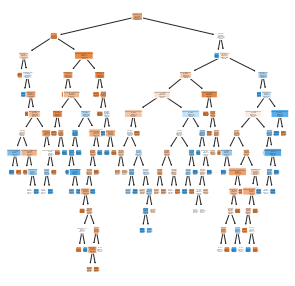

In [30]:
from sklearn.tree import plot_tree # tree diagram
a = df.drop(columns = ['Target'])
feature_names = a.columns[:,]
target_names = df['Target'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)




# 가지치기
깊이 제한

In [61]:
model1 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model1.fit(x_train, y_train)
model1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

깊이 제한후 modelscore가 감소했지만 여전히 높은수치라고 판단

In [62]:
print(model1.score(x_train, y_train))
print(model1.score(x_test, y_test))

0.8283093053735255
0.837696335078534


[Text(2480.0, 4756.5, 'FrequentFlyer_1 <= 0.5\nentropy = 0.793\nsamples = 763\nvalue = [581, 182]\nclass = O'),
 Text(1240.0, 3397.5, 'ServicesOpted <= 1.5\nentropy = 0.524\nsamples = 533\nvalue = [470, 63]\nclass = O'),
 Text(620.0, 2038.5, 'entropy = 0.0\nsamples = 170\nvalue = [170, 0]\nclass = O'),
 Text(1860.0, 2038.5, 'Age <= 28.5\nentropy = 0.666\nsamples = 363\nvalue = [300, 63]\nclass = O'),
 Text(1240.0, 679.5, 'entropy = 0.996\nsamples = 56\nvalue = [26, 30]\nclass = X'),
 Text(2480.0, 679.5, 'entropy = 0.492\nsamples = 307\nvalue = [274, 33]\nclass = O'),
 Text(3720.0, 3397.5, 'Age <= 28.5\nentropy = 0.999\nsamples = 230\nvalue = [111, 119]\nclass = X'),
 Text(3100.0, 2038.5, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31]\nclass = X'),
 Text(4340.0, 2038.5, 'ServicesOpted <= 2.5\nentropy = 0.99\nsamples = 199\nvalue = [111, 88]\nclass = O'),
 Text(3720.0, 679.5, 'entropy = 0.944\nsamples = 141\nvalue = [90, 51]\nclass = O'),
 Text(4960.0, 679.5, 'entropy = 0.944\nsamples = 5

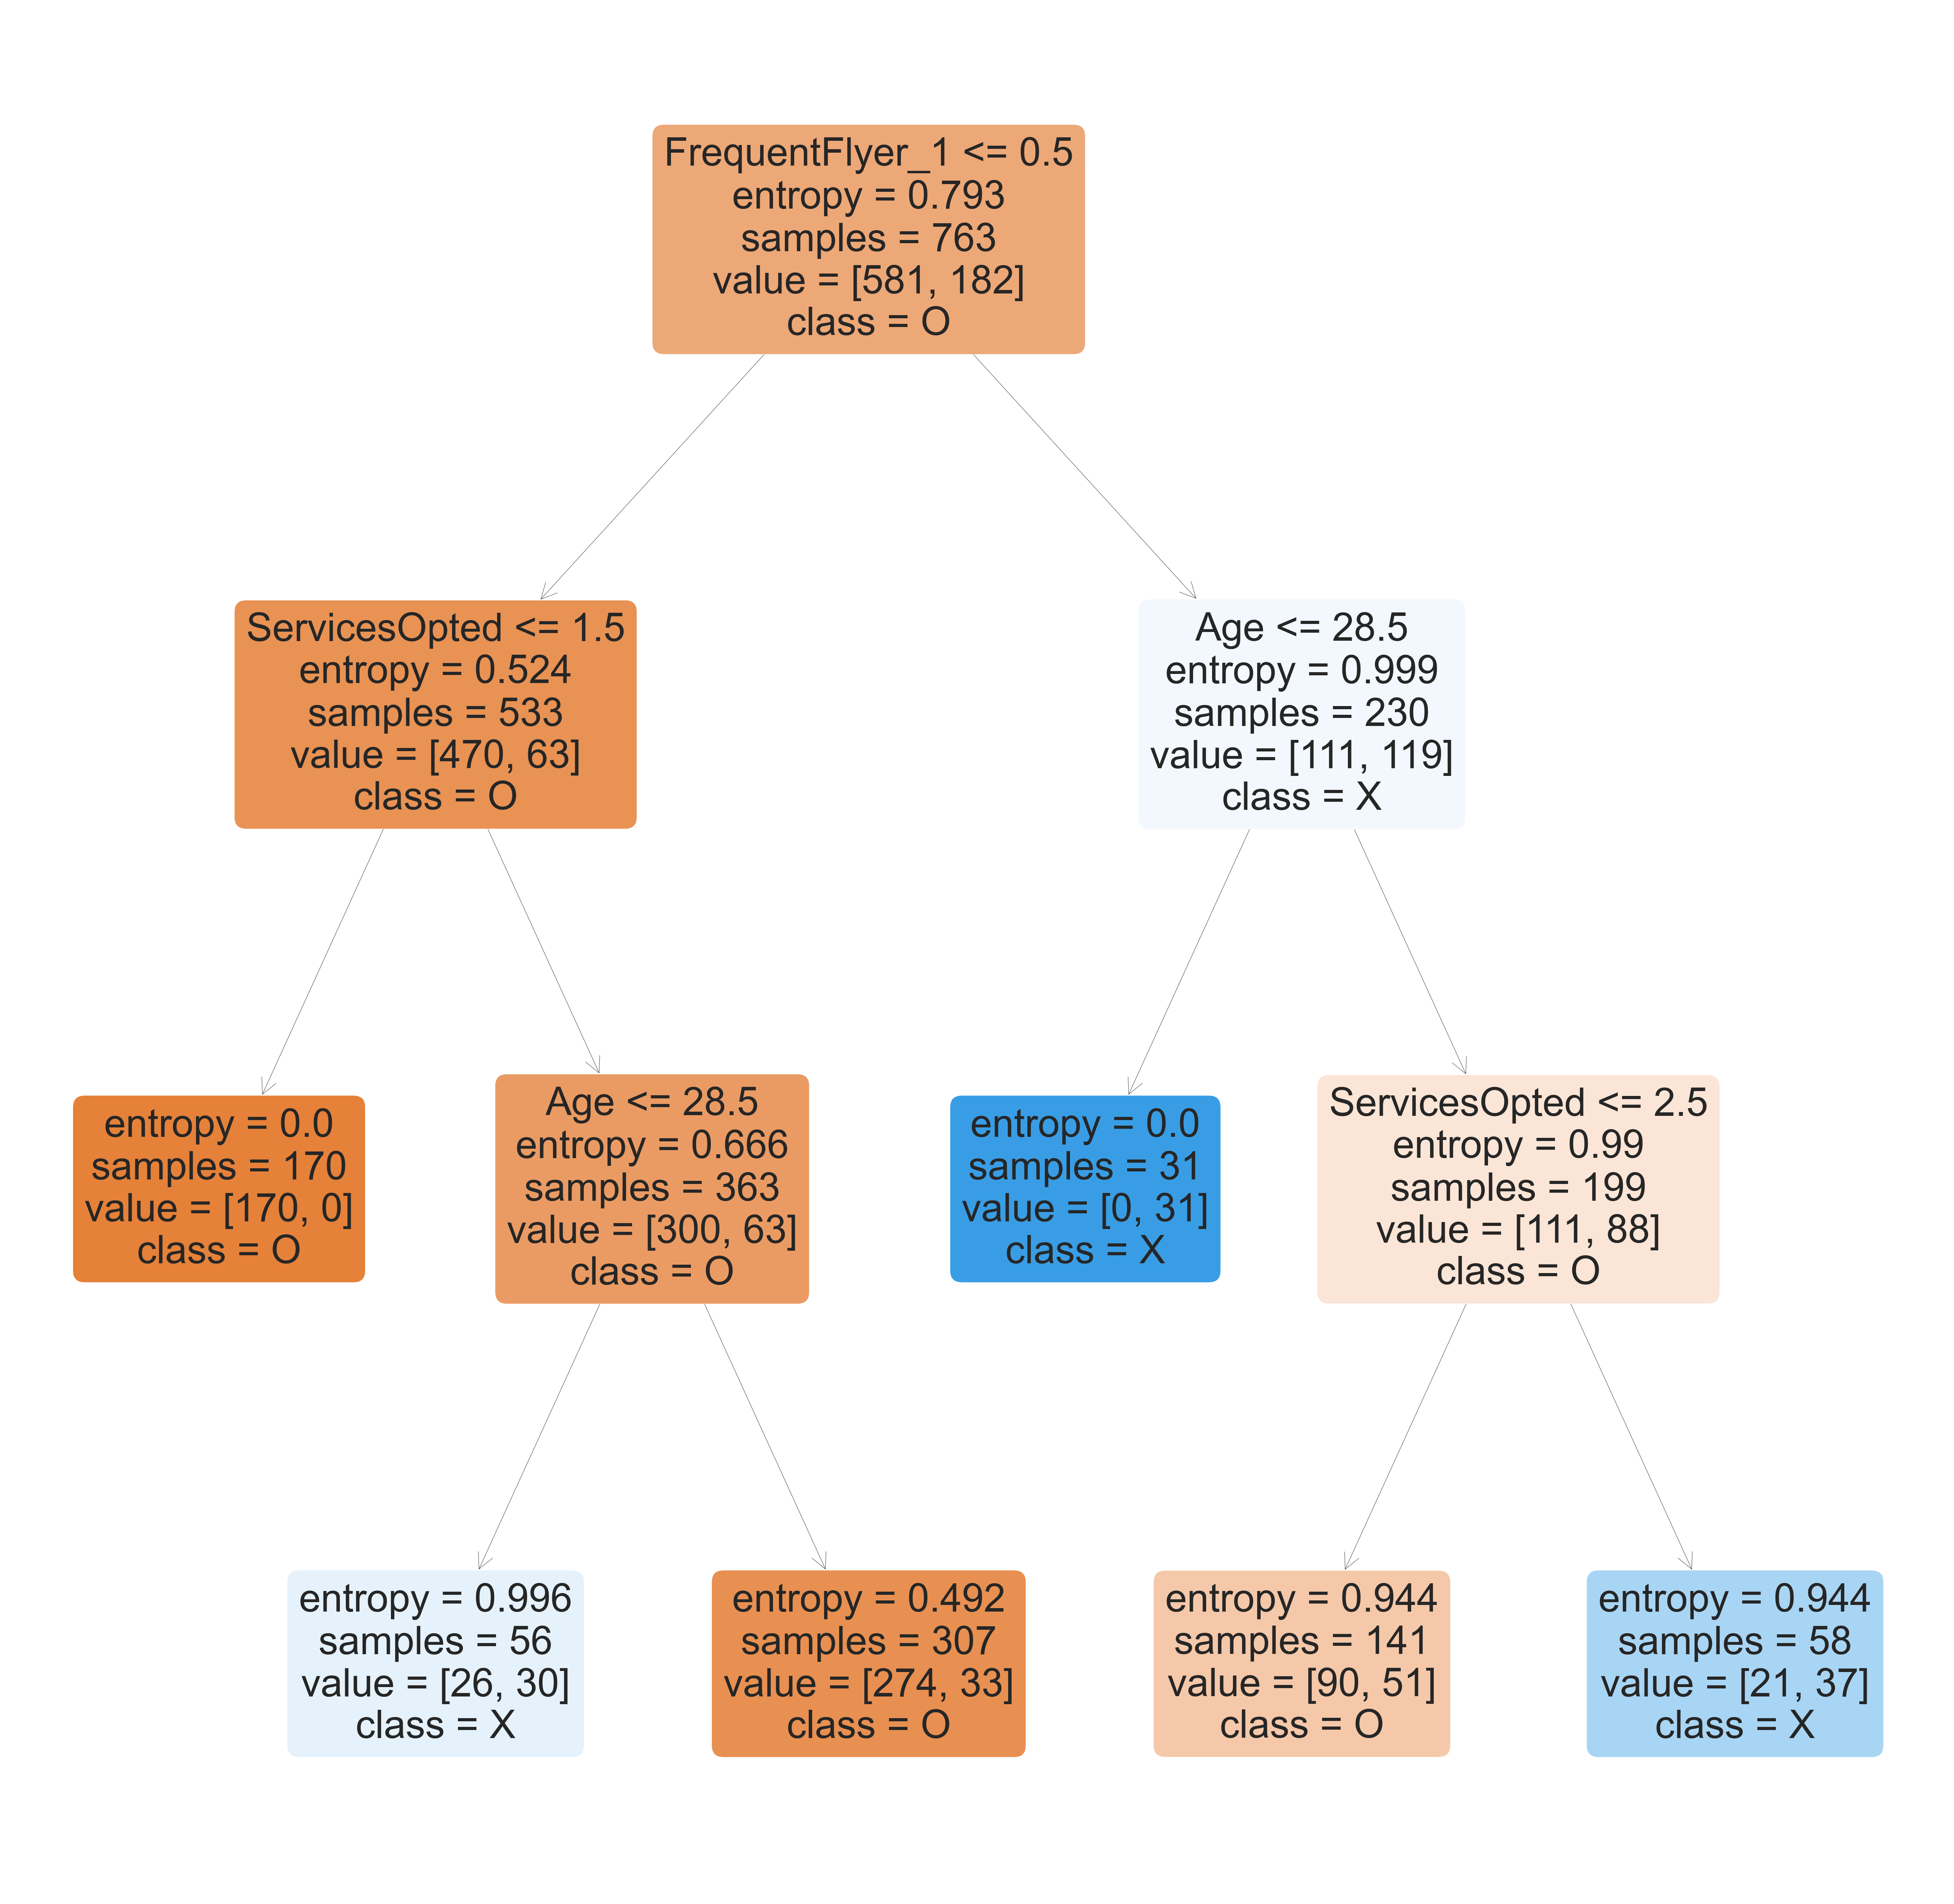

In [63]:
plt.figure(figsize=(100,100))

from sklearn.tree import plot_tree # tree diagram
a = df.drop(columns = ['Target'])
feature_names = a.columns[:,]
target_names = df['Target'].unique().tolist()

plot_tree(model1, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)


